# Manipulating graphs with Python

Python has many functions for manipulating and investigating graphs.
Refer to the following URL for more documentation:
<https://networkx.org>

## Useful Python graph functions

``` python
import networkx as nx
```
Create directed graph from edge list or adjacency matrix

``` python
# Use here the class DiGraph from module networkx for directed graphs:
G = nx.DiGraph()
# For graph from adjacency matrix use the function:
nx.from_numpy_matrix('adjacency matrix inputted here', create_using=G)
# For graph from edge list use function:
G.add_edges_from('edge list inputted here')
```
Create undirected graphs
``` python
# Similarly to directed graphs, first initialise an undirected graph:
G = nx.Graph()
# Using an adjacency matrix:
nx.from_numpy_matrix('adjacency matrix inputted here', create_using=G)
# Using an edge list:
G.add_edges_from('edge list inputted here')
```

Get number of nodes and edges
``` python

G.number_of_edges() # either returns the number of edges between two nodes if specified or the total number of edges
G.number_of_nodes() # returns number of nodes
```

Remove loops and multiple edges
```python
G.simplify()
G.is_simple() # checks if the graph is simple
```

Create a subgraph
```python
G.subgraph('nodes inputted here')
```

Perform breadth first search

There is no in-built function in python but it is relatively straight forward to create your own (see hidden code).

In [1]:
# Where M is the adjacency matrix and i the starting node of the search
def bfs(M,i):

    visited = np.zeros((len(M),1))
    frontier = [i]
    visited[i] = 1
    result = [i]
    while len(frontier)>0:
        next = []
        for j in frontier:
            for k in get_successors(M,j):
                if visited[k] == 0:
                    next.append(k)
                    result.append(k)
                    visited[k] = 1
        frontier = next

    return result

Calculate distance matrix between node pairs
```python
:tags: ["remove-output"]

# For unweighted graph
nx.all_pairs_shortest_path(G) # calculates shortest paths between all nodes
nx.all_pairs_shortest_path_length(G) # lengths of shortest paths between nodes 
# And similarly for weighted graphs:
nx.all_pairs_dijkstra_path(G)
nx.all_pairs_dijkstra_path_length(G)
```

Find strongly and weakly connected components
``` python
:tags: ["remove-output"]

nx.weakly_connected_components(G)
nx.strongly_connected_components(G)
# Get number of strongly/weakly connected components:
nx.number_strongly_connected_components(G)
nx.number_weakly_connected_components(G)
```
Find shortest path between nodes
```python
:tags: ["remove-output"]

nx.shortest_path(G, 'source node inputted here', 'target node inputted here')
```

Plot graph and set node colour
```python
:tags: ["remove-output"]

# Use the networkx drawing modules:
from networkx.drawing.nx_pylab import draw, draw_networkx
draw(G, node_color='b') # can change colour and other properties here
draw_networkx(G) # an alternative function that works the same as draw
nx.relabel_nodes(G,mapping={0:1,1:2,2:3}) # can relabel nodes so the ordering is the same as in matlab

# Use matplotlib to display the network
import matplotlib.pyplot as plt
plt.draw()
plt.show()
```

### Example

{1, 2, 3}


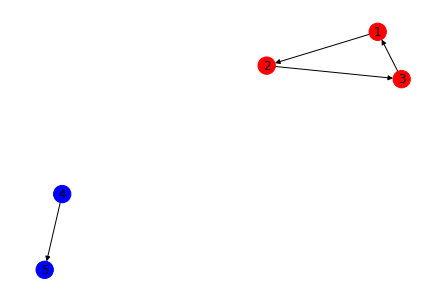

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_pylab import draw

# Create a graph from an edge list 
edges = [(1, 2), (2, 3), (3, 1), (4,5)]
G = nx.DiGraph()
G.add_edges_from(edges)

# Determine its connected components and color the largest one
largest_cc = max(nx.weakly_connected_components(G), key=len)
print(largest_cc)
color_map = []
for node in G:
    if node in largest_cc:
        color_map.append('red')
    else:
        color_map.append('blue')
draw(G, with_labels=True, node_color=color_map)
plt.show()

### Question 1
1.  Draw a picture (by hand) of a connected simple digraph with ten nodes and three strongly connected components.
1. Use Python to:
    1. Create and plot your graph.
    1. Colour the nodes according to their strongly connected component.
    1. Determine the pair of nodes i, j with the greatest path distance. Hint: use the following code to find the maximum element of matrix d. **TBC** <br>
        *d = nx.all_pairs_shortest_path(G)* <br>
        *m = max(d)* <br>
        *i,j = np.where(d==m)* 
    1. Determine the shortest path between i and j and increase the width of its edges to 2 points.

In this workshop we will start investigating real nervous system connectivity data. To do this we will need to import the data into Python.

## Importing Data into Python

We are used to storing and manipulating data in Python Numpy arrays. However, arrays may only be used for storing numerical data. For other types of data (such as text) Python has a different package called Pandas which works with **dataframes**. Much like a database table, Pandas dataframes store rows of data consisting of multiple heterogeneous data types. In the next question we will import connectivity data of the C-Elegans into a Pandas dataframe.